In [1]:
import pandas as pd

In [9]:
df = pd.read_csv('C:\\Users\\stoer\\Downloads\\BostonHousing.csv')
df.to_csv('bosten_house.csv')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [11]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


Feature selection
selection by variance

In [12]:
df.var()

crim          73.986578
zn           543.936814
indus         47.064442
chas           0.064513
nox            0.013428
rm             0.493671
age          792.358399
dis            4.434015
rad           75.816366
tax        28404.759488
ptratio        4.686989
b           8334.752263
lstat         50.994760
medv          84.586724
dtype: float64

In [13]:
df = df.drop(columns=['chas', 'nox'])

Be careful and not to just delete things.

Selection by correlation

In [14]:
import seaborn as sn
import matplotlib.pyplot as plt

<Axes: >

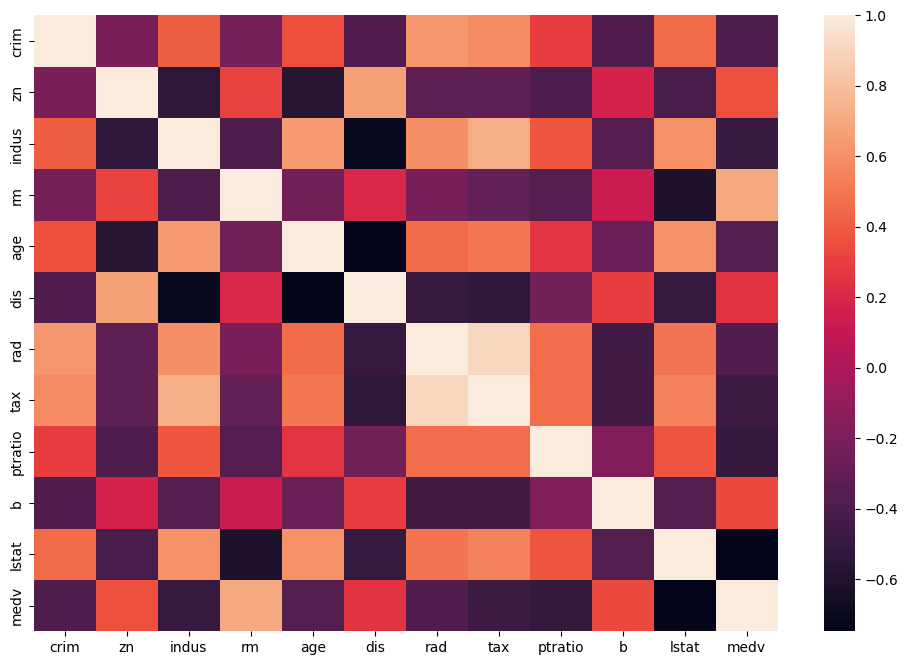

In [15]:
fig_dims = (12, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sn.heatmap(df.corr(), ax=ax)

In [16]:
abs(df.corr()['medv'])

crim       0.388305
zn         0.360445
indus      0.483725
rm         0.695360
age        0.376955
dis        0.249929
rad        0.381626
tax        0.468536
ptratio    0.507787
b          0.333461
lstat      0.737663
medv       1.000000
Name: medv, dtype: float64

In [17]:
abs(df.corr()['medv'][abs(df.corr()['medv'])>0.5].drop('medv')).index.tolist()

['rm', 'ptratio', 'lstat']

In [ ]:
vals = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]

for val in vals:
    features = abs(df.corr()['medv'][abs(df.corr()['medv'])>val].drop('medv')).index.tolist()

    X = df.drop(columns='medv')
    X = X[features]

    print(features)

    #y_pred = cross_val_predict(pipeline, X, y, cv=cv)


Selection using a wrapper

In [19]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [ ]:
sfs1 = SFS(pipeline, 
           k_features=10, 
           forward=True, 
           scoring='neg_mean_squared_error',
           cv=cv)
X = df.drop(columns='medv')

sfs1.fit(X, y)

sfs1.subsets_

If two variable interact with each other, are nagtively interacting each other, adding interaction terms by multiplying together. Check the model improvement and decide if this is a good approach.

In [20]:
# Build model with the selected features

In [22]:
#Remove outliers if necessary
df = df.drop(df[df['medv']==df['medv'].max()].index.tolist())

In [23]:
#build model

In [ ]:
# incooperate nonelinear relationship based on the pairplot (if necessary)
df['lstat_new'] = df['lstat']**2